# Isotropic Velocities Analysis

Let's first import the Isotropy class from santex for Isotropic velocities analysis

In [1]:
from santex import Isotropy

# Define isotropy instance

We first create an instance of isotropy class by invoking ```isotropy = Isotropy()```

In [2]:
isotropy = Isotropy()

# Get Available phases

Let's check the available materials on which we can get the isotropic wave velocities at different pressure and temperature profile

In [3]:
isotropy.get_available_phases()

######################Available Phases######################
Material id: aqz       Material name: Alpha-Quartz
######################Available Phases######################
Material id: bqz       Material name: Beta-Quartz
######################Available Phases######################
Material id: coe       Material name: Coesite
######################Available Phases######################
Material id: hAb       Material name: High-T Albite
######################Available Phases######################
Material id: lAb       Material name: Low-T Albite
######################Available Phases######################
Material id: an       Material name: Anorthite
######################Available Phases######################
Material id: or       Material name: Orthoclase
######################Available Phases######################
Material id: san       Material name: Sanidine
######################Available Phases######################
Material id: alm       Material name: Almandine
###########

['aqz',
 'bqz',
 'coe',
 'hAb',
 'lAb',
 'an',
 'or',
 'san',
 'alm',
 'gr',
 'py',
 'fo',
 'fa',
 'en',
 'fs',
 'mgts',
 'di',
 'hed',
 'jd',
 'ac',
 'cats',
 'gl',
 'fgl',
 'tr',
 'fact',
 'ts',
 'parg',
 'hb',
 'anth',
 'phl',
 'ann',
 'mu',
 'cel',
 'ta',
 'clin',
 'daph',
 'atg',
 'zo',
 'cz',
 'ep',
 'law',
 'pre',
 'pump',
 'lmt',
 'wrk',
 'br',
 'chum',
 'phA',
 'sill',
 'ky',
 'sp',
 'herc',
 'mt',
 'ilm',
 'rut',
 'ttn',
 'crd',
 'scap',
 'cc',
 'arag',
 'mag']

# Get phase constants for eg Forsterite

Following are the information we get when we invoke the method ```get_phase_constants()```

1. rho0: initial density
2. ao: coefficient of thermal expansion
3. akt0: isothermal bulk modulus, which is a measure of a material's resistance to compression under uniform pressure
4. dkdp: pressure derivative of the bulk modulus, indicating how the bulk modulus changes with pressure
5. amu0: shear modulus of the mineral. The shear modulus measures a material's resistance to deformation by shear stress
6. dmudp: pressure derivative of the shear modulus, indicating how the shear modulus changes with pressure
7. gam: gamma, first thermodynamic Gruinesen parameter
8. grun: second Gruneisen parameter, which is a measure of how a material's volume changes with temperature
9. delt: Debye temperature, which is a measure of the average vibrational energy of atoms in a solid.


In [4]:
isotropy.get_phase_constants("Forsterite")

{'id': 'fo',
 'name': 'Forsterite',
 'rho0': 3222.0,
 'ao': 6.13e-05,
 'akt0': 127300000000.0,
 'dkdp': 4.2,
 'amu0': 81600000000.0,
 'dmudp': 1.6,
 'gam': 5.19,
 'grun': 1.29,
 'delt': 5.5}

# Get velocities and densities

We can get the following quantities at any given temperature and pressure for a material after invoking the method ```calculate_seismic_properties()```

1. density: density of material at any given pressure and temperature
2. aks: bulk modulus, The bulk modulus indicates how much a material will compress under pressure. 
3. amu: Shear Modulus, The shear modulus is essential for understanding a material's response to shear stress
4. vp: P-wave velocity at any given pressure and temperature
5. vs: swave velocity at any given pressure and temperature
6. vbulk: Bulk sound velocity, The velocity of sound waves traveling through a material
7. akt: Isothermal bulk modulus, Similar to the bulk modulus, but specifically refers to the resistance to compression under constant 8. temperature conditions

In [5]:
density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('Forsterite', temperature=2000, pressure=2, return_vp_vs_vbulk=True, return_aktout=True)
print(vp, vs)

7.5781436531609305 4.294565839495191


In [17]:
vp

7.5781436531609305

In [18]:
vs

4.294565839495191

In [19]:
density

3034.1119267366676

In [20]:
vs

4.294565839495191

In [21]:
vbulk

5.730428867439992

In [22]:
akt

88588086722.73985

In [23]:
density

3034.1119267366676

In [24]:
density

3034.1119267366676

In [25]:
density_list = []

for p in range(10):
    density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('coe', temperature=1000, pressure=p*10**9, return_vp_vs_vbulk=True, return_aktout=True)
    print(density)
    density_list.append(density)



2879.3845875077277
899058.0751625975
1135345.6279549084
1301206.6313457738
1433298.73498328
1544874.7508737324
1642424.361883237
1729668.5937436596
1808962.9045480955
1881903.907812139


In [12]:
import matplotlib.pyplot as plt

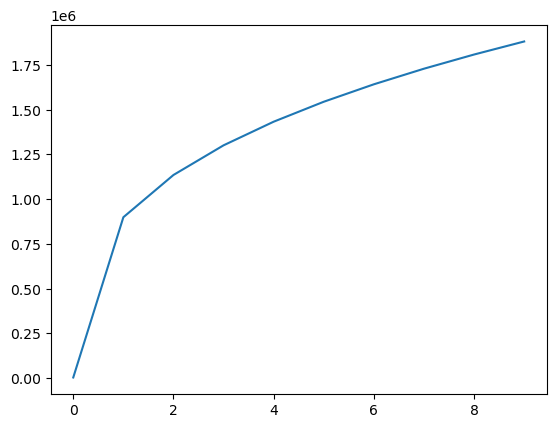

In [13]:
plt.plot(density_list)

In [14]:
density_list = []

for p in range(300, 2000):
    density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('coe', temperature=p, pressure=2*10**9, return_vp_vs_vbulk=True, return_aktout=True)
    print(density)
    density_list.append(density)



1129961.1608394205
1129967.8873271218
1129974.6180522281
1129981.3530038625
1129988.092171195
1129994.8355434423
1130001.583109868
1130008.334859782
1130015.090782541
1130021.8508675469
1130028.6151042476
1130035.3834821363
1130042.155990751
1130048.9326196744
1130055.7133585343
1130062.4981970028
1130069.287124795
1130076.0801316707
1130082.8772074329
1130089.6783419272
1130096.4835250436
1130103.2927467134
1130110.105996911
1130116.923265653
1130123.744542998
1130130.5698190455
1130137.3990839378
1130144.232327858
1130151.0695410292
1130157.9107137164
1130164.7558362249
1130171.6048988996
1130178.4578921269
1130185.314806331
1130192.175631977
1130199.0403595692
1130205.908979651
1130212.7814828046
1130219.6578596507
1130226.5381008482
1130233.4221970958
1130240.310139128
1130247.2019177189
1130254.0975236788
1130260.9969478564
1130267.9001811375
1130274.8072144443
1130281.7180387354
1130288.6326450072
1130295.5510242917
1130302.4731676567
1130309.3990662068
1130316.328711081
1130323.

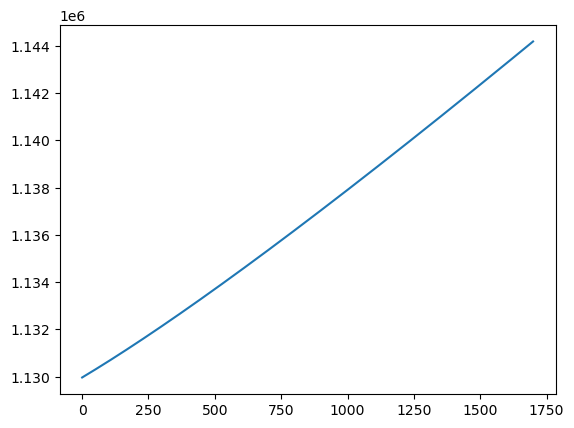

In [15]:
plt.plot(density_list)

In [16]:
isotropy.get_phase_constants("coe")

{'id': 'coe',
 'name': 'Coesite',
 'rho0': 2911.0,
 'ao': 1.8e-05,
 'akt0': 97400000000.0,
 'dkdp': 4.3,
 'amu0': 61600000000.0,
 'dmudp': 1.054072553045859,
 'gam': 4.66,
 'grun': 0.36,
 'delt': 4.66}